In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')
import random

# declaring K-Means parameters
k = 4
dimensions = 2
num_samples = 100
iterations = 6000

# creating clusters
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=num_samples, n_features=dimensions, centers=k, random_state=random.randint(1,200))

data_length = X.shape[0]
data_dimensions = X.shape[1] 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# creating an empty centroid array
centroids = np.array([]).reshape(data_dimensions, 0) 

# creating k random centroids
for centroid in range(k):
  centroids = np.c_[centroids, X[random.randint(0, data_length - 1)]]

In [3]:
# here I will perform one iteration that I can later repeat as necessary

# creating empty array of distances using euclid in this case
euclid = np.array([]).reshape(data_length,0)

# finding distance between centroids for each point
for centroid in range(k):
  distance = np.sum((X - centroids[:, centroid]) ** 2, axis=1)
  euclid = np.c_[euclid, distance]

# storing the minimum value we have computed
minimum = np.argmin(euclid, axis=1)+1 # the +1 is for a dict key (they start at 1 instead of zero)

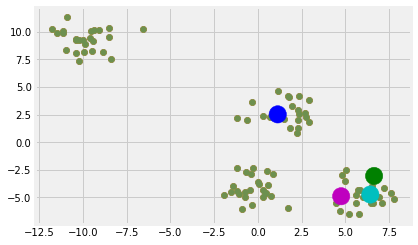

In [4]:
# plotting the centroids with different colors to see placement
for centroid in range(k):
  plt.scatter(X[:,0],X[:,1])

colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.scatter(centroids[0,:],centroids[1,:],s=300,c=colors[:k])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

In [5]:
# computing the mean of separated clusters
center={}
for centroid in range(k):
  center[centroid + 1] = np.array([]).reshape(dimensions,0)

# assigning of clusters to points
for datapoint_index in range(data_length):
  center[minimum[datapoint_index]] = np.c_[center[minimum[datapoint_index]], X[datapoint_index]]
for centroid in range(k):
  center[centroid + 1]=center[centroid + 1].T
  # print(center[centroid + 1])

# computing mean and updating it
for centroid in range(k):
  centroids[:, centroid] = np.mean(center[centroid + 1], axis=0)

In [6]:
# repeating the steps above for the specified number of iterations
for i in range(iterations):
  euclid=np.array([]).reshape(data_length,0)
  for centroid in range(k):
    distance=np.sum((X-centroids[:,centroid]) ** 2, axis=1)
    euclid=np.c_[euclid,distance]
  minimum_index=np.argmin(euclid,axis=1)+1
  center={}
  for centroid in range(k):
    center[centroid+1]=np.array([]).reshape(dimensions,0)
  for datapoint_index in range(data_length):
    center[minimum_index[datapoint_index]]=np.c_[center[minimum_index[datapoint_index]],X[datapoint_index]]
  for centroid in range(k):
    center[centroid+1]=center[centroid+1].T
  for centroid in range(k):
    centroids[:,centroid]=np.mean(center[centroid+1],axis=0)
  final=center

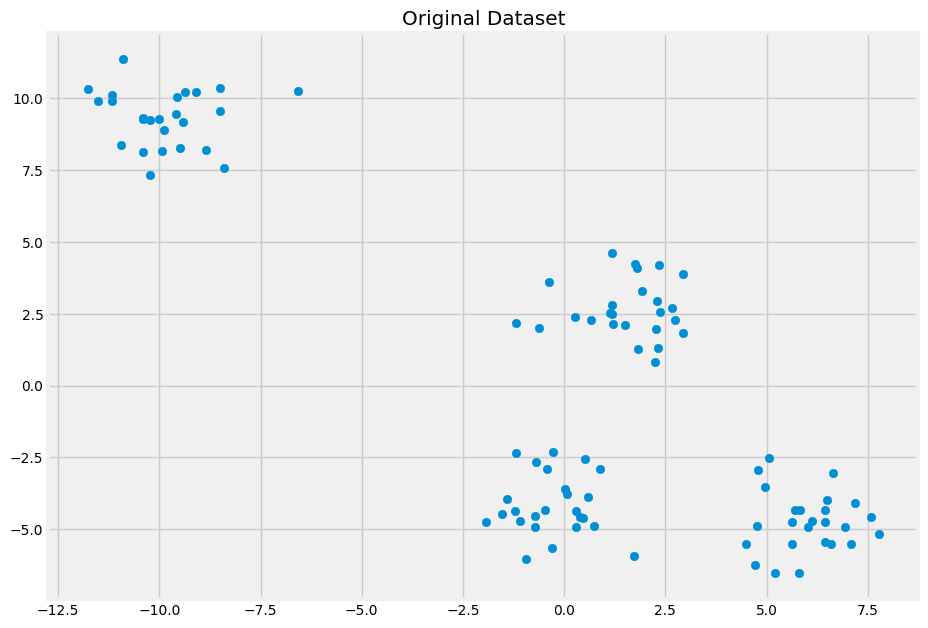

In [7]:
# plotting original dataset
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')
plt.show()

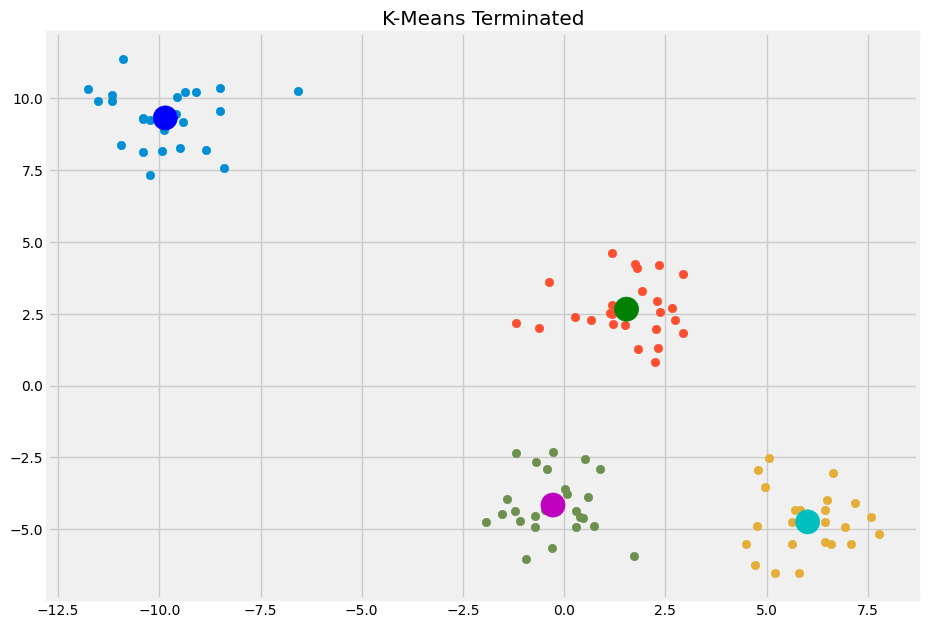

In [8]:
# plotting dataset with centroids
for centroid in range(k):
  plt.scatter(final[centroid+1][:,0],final[centroid+1][:,1])
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.scatter(centroids[0,:],centroids[1,:],s=300,c=colors[:k])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('K-Means Terminated')
plt.show()